<a href="https://colab.research.google.com/github/AyumuMiota/mysite/blob/master/%E3%80%90%E8%87%AA%E7%84%B6%E8%A8%80%E8%AA%9E%E5%87%A6%E7%90%86%E3%80%91%E3%83%86%E3%82%AD%E3%82%B9%E3%83%88%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 形態素解析

日本語の形態素解析には【MeCab】

Tagger クラスをインスタンス化[github](https://taku910.github.io/mecab/)

## MeCabインストール

In [ ]:
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl libio-string

## 進める

In [ ]:
import MeCab
mecab = MeCab.Tagger('-Ochasen')  # -Ochasen : 形態素解析の出力方法の指定



In [ ]:
# 文章の分割に parse() メソッド
res = mecab.parse('こんにちは、私はキカガクです。')

In [ ]:
print(res)

こんにちは	コンニチハ	こんにちは	感動詞		
、	、	、	記号-読点		
私	ワタシ	私	名詞-代名詞-一般		
は	ハ	は	助詞-係助詞		
キカガク	キカガク	キカガク	名詞-一般		
です	デス	です	助動詞	特殊・デス	基本形
。	。	。	記号-句点		
EOS



形態素解析した結果は下記のように、エスケープシーケンス（改行などを表す特殊な文字列）を多く含む

In [ ]:
res

'こんにちは\tコンニチハ\tこんにちは\t感動詞\t\t\n、\t、\t、\t記号-読点\t\t\n私\tワタシ\t私\t名詞-代名詞-一般\t\t\nは\tハ\tは\t助詞-係助詞\t\t\nキカガク\tキカガク\tキカガク\t名詞-一般\t\t\nです\tデス\tです\t助動詞\t特殊・デス\t基本形\n。\t。\t。\t記号-句点\t\t\nEOS\n'

# 名詞の抽出の練習

In [ ]:
text1 = 'キカガクでは、ディープラーニングを含んだ機械学習や人工知能の教育を行っています。'
text2 = '代表の吉崎は大学院では機械学習・ロボットのシステム制御、画像処理の研究に携わっていました。'
text3 = '機械学習、システム制御、画像処理ではすべて線形代数とプログラミングが不可欠になります。'

## 形態素解析

In [ ]:
# 形態素解析
res = mecab.parse(text1)
print(res)

キカガク	キカガク	キカガク	名詞-一般		
で	デ	で	助詞-格助詞-一般		
は	ハ	は	助詞-係助詞		
、	、	、	記号-読点		
ディープラーニング	ディープラーニング	ディープラーニング	名詞-一般		
を	ヲ	を	助詞-格助詞-一般		
含ん	フクン	含む	動詞-自立	五段・マ行	連用タ接続
だ	ダ	だ	助動詞	特殊・タ	基本形
機械	キカイ	機械	名詞-一般		
学習	ガクシュウ	学習	名詞-サ変接続		
や	ヤ	や	助詞-並立助詞		
人工	ジンコウ	人工	名詞-一般		
知能	チノウ	知能	名詞-一般		
の	ノ	の	助詞-連体化		
教育	キョウイク	教育	名詞-サ変接続		
を	ヲ	を	助詞-格助詞-一般		
行っ	オコナッ	行う	動詞-自立	五段・ワ行促音便	連用タ接続
て	テ	て	助詞-接続助詞		
い	イ	いる	動詞-非自立	一段	連用形
ます	マス	ます	助動詞	特殊・マス	基本形
。	。	。	記号-句点		
EOS



In [ ]:
res

'キカガク\tキカガク\tキカガク\t名詞-一般\t\t\nで\tデ\tで\t助詞-格助詞-一般\t\t\nは\tハ\tは\t助詞-係助詞\t\t\n、\t、\t、\t記号-読点\t\t\nディープラーニング\tディープラーニング\tディープラーニング\t名詞-一般\t\t\nを\tヲ\tを\t助詞-格助詞-一般\t\t\n含ん\tフクン\t含む\t動詞-自立\t五段・マ行\t連用タ接続\nだ\tダ\tだ\t助動詞\t特殊・タ\t基本形\n機械\tキカイ\t機械\t名詞-一般\t\t\n学習\tガクシュウ\t学習\t名詞-サ変接続\t\t\nや\tヤ\tや\t助詞-並立助詞\t\t\n人工\tジンコウ\t人工\t名詞-一般\t\t\n知能\tチノウ\t知能\t名詞-一般\t\t\nの\tノ\tの\t助詞-連体化\t\t\n教育\tキョウイク\t教育\t名詞-サ変接続\t\t\nを\tヲ\tを\t助詞-格助詞-一般\t\t\n行っ\tオコナッ\t行う\t動詞-自立\t五段・ワ行促音便\t連用タ接続\nて\tテ\tて\t助詞-接続助詞\t\t\nい\tイ\tいる\t動詞-非自立\t一段\t連用形\nます\tマス\tます\t助動詞\t特殊・マス\t基本形\n。\t。\t。\t記号-句点\t\t\nEOS\n'

### 改行 (\n) で分割を行う
    特定の文字列でテキストデータを分けるときは、split()

In [ ]:
res.split('\n')

['キカガク\tキカガク\tキカガク\t名詞-一般\t\t',
 'で\tデ\tで\t助詞-格助詞-一般\t\t',
 'は\tハ\tは\t助詞-係助詞\t\t',
 '、\t、\t、\t記号-読点\t\t',
 'ディープラーニング\tディープラーニング\tディープラーニング\t名詞-一般\t\t',
 'を\tヲ\tを\t助詞-格助詞-一般\t\t',
 '含ん\tフクン\t含む\t動詞-自立\t五段・マ行\t連用タ接続',
 'だ\tダ\tだ\t助動詞\t特殊・タ\t基本形',
 '機械\tキカイ\t機械\t名詞-一般\t\t',
 '学習\tガクシュウ\t学習\t名詞-サ変接続\t\t',
 'や\tヤ\tや\t助詞-並立助詞\t\t',
 '人工\tジンコウ\t人工\t名詞-一般\t\t',
 '知能\tチノウ\t知能\t名詞-一般\t\t',
 'の\tノ\tの\t助詞-連体化\t\t',
 '教育\tキョウイク\t教育\t名詞-サ変接続\t\t',
 'を\tヲ\tを\t助詞-格助詞-一般\t\t',
 '行っ\tオコナッ\t行う\t動詞-自立\t五段・ワ行促音便\t連用タ接続',
 'て\tテ\tて\t助詞-接続助詞\t\t',
 'い\tイ\tいる\t動詞-非自立\t一段\t連用形',
 'ます\tマス\tます\t助動詞\t特殊・マス\t基本形',
 '。\t。\t。\t記号-句点\t\t',
 'EOS',
 '']

最後のEOSと空白('')を削除(スライス)

In [ ]:
# 最後の 2つの要素までをスライス
res.split('\n')[:-2]

['キカガク\tキカガク\tキカガク\t名詞-一般\t\t',
 'で\tデ\tで\t助詞-格助詞-一般\t\t',
 'は\tハ\tは\t助詞-係助詞\t\t',
 '、\t、\t、\t記号-読点\t\t',
 'ディープラーニング\tディープラーニング\tディープラーニング\t名詞-一般\t\t',
 'を\tヲ\tを\t助詞-格助詞-一般\t\t',
 '含ん\tフクン\t含む\t動詞-自立\t五段・マ行\t連用タ接続',
 'だ\tダ\tだ\t助動詞\t特殊・タ\t基本形',
 '機械\tキカイ\t機械\t名詞-一般\t\t',
 '学習\tガクシュウ\t学習\t名詞-サ変接続\t\t',
 'や\tヤ\tや\t助詞-並立助詞\t\t',
 '人工\tジンコウ\t人工\t名詞-一般\t\t',
 '知能\tチノウ\t知能\t名詞-一般\t\t',
 'の\tノ\tの\t助詞-連体化\t\t',
 '教育\tキョウイク\t教育\t名詞-サ変接続\t\t',
 'を\tヲ\tを\t助詞-格助詞-一般\t\t',
 '行っ\tオコナッ\t行う\t動詞-自立\t五段・ワ行促音便\t連用タ接続',
 'て\tテ\tて\t助詞-接続助詞\t\t',
 'い\tイ\tいる\t動詞-非自立\t一段\t連用形',
 'ます\tマス\tます\t助動詞\t特殊・マス\t基本形',
 '。\t。\t。\t記号-句点\t\t']

In [ ]:
# 1 つ目の単語をスライス
res.split('\n')[0]

'キカガク\tキカガク\tキカガク\t名詞-一般\t\t'

In [ ]:
# 品詞の取得
# \t で区切られた 4番目
res.split('\n')[0].split('\t')[3]

'名詞-一般'

### 品詞が名詞の単語を格納するリストを作る

In [ ]:
nouns = []  # 品詞が名詞(noun)である単語を格納するリスト

res = mecab.parse(text1)    # 形態素解析
words = res.split('\n')[:-2]   # wordsに最後の 2つの要素までをスライスしたものを入れる
for word in words:
  part = word.split('\t')      # part に \tで分割したものを入れる
  if '名詞' in part[3]:         # \tで分割したものの4番目が名詞のとき
    nouns.append(part[0])    # \tで分割したものの1番目をnounsリストに入れる

In [ ]:
nouns

['キカガク', 'ディープラーニング', '機械', '学習', '人工', '知能', '教育']

上記プログラムを関数化する

In [ ]:
def get_nouns(text):
  nouns = []
  res = mecab.parse(text)
  words = res.split('\n')[:-2]
  for word in words:
    part = word.split('\t')
    if '名詞' in part[3]:
      nouns.append(part[0])
  return nouns

In [ ]:
nouns1 = get_nouns(text1)
nouns1

['キカガク', 'ディープラーニング', '機械', '学習', '人工', '知能', '教育']

In [ ]:
nouns2 = get_nouns(text2)
nouns2

['代表', '吉崎', '大学院', '機械', '学習', 'ロボット', 'システム', '制御', '画像', '処理', '研究']

In [ ]:
nouns3 = get_nouns(text3)
nouns3

['機械', '学習', 'システム', '制御', '画像', '処理', 'すべて', '線形', '代数', 'プログラミング', '不可欠']

# 自然言語の特徴量変換

【テキストのベクトル化】
- Bag of Words (Count encoding)
- tf-idf
- One-hot encoding
- Word2Vec

## Bag of Words (Count encoding)
    単語の出現回数によって単語を数値に変換する方法

1. 私は電車が好きです。

2. 電車より車をよく使います。

3. 好きな果物はりんごです。

3 つの文に出現する単語をすべて羅列

出現する単語から重複を取り除いたもの = 辞書

［ 私　は　電車　が　好き　です　より　車　を　よく　使い　ます　な　果物　りんご ］

1. ［ 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 ］

2. ［ 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 ］

3. ［ 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 ］

### BoWの実装

In [ ]:
nouns1

['キカガク', 'ディープラーニング', '機械', '学習', '人工', '知能', '教育']

In [ ]:
nouns2

['代表', '吉崎', '大学院', '機械', '学習', 'ロボット', 'システム', '制御', '画像', '処理', '研究']

In [ ]:
nouns3

['機械', '学習', 'システム', '制御', '画像', '処理', 'すべて', '線形', '代数', 'プログラミング', '不可欠']

In [ ]:
# 要素を半角スペースで結合
' '.join(nouns1)

'キカガク ディープラーニング 機械 学習 人工 知能 教育'

In [ ]:
# 上記処理をすべてのtextに適用 → 1つのリストに格納
nouns_list = [nouns1, nouns2, nouns3]
corpus = []
for nouns in nouns_list:
  corpus.append(' '.join(nouns))

In [ ]:
corpus

['キカガク ディープラーニング 機械 学習 人工 知能 教育',
 '代表 吉崎 大学院 機械 学習 ロボット システム 制御 画像 処理 研究',
 '機械 学習 システム 制御 画像 処理 すべて 線形 代数 プログラミング 不可欠']

#### CountVectorizerクラスを使用

インスタンス後にfit_transform()の使用で単語ごとにIDが振られ

IDごとの出現回数をもとにベクトル化

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(corpus)

In [ ]:
# 単語ごとのIDを確認、文字の重複がないことがわかる
vectorizer.vocabulary_

{'すべて': 0,
 'キカガク': 1,
 'システム': 2,
 'ディープラーニング': 3,
 'プログラミング': 4,
 'ロボット': 5,
 '不可欠': 6,
 '人工': 7,
 '代数': 8,
 '代表': 9,
 '処理': 10,
 '制御': 11,
 '吉崎': 12,
 '大学院': 13,
 '学習': 14,
 '教育': 15,
 '機械': 16,
 '画像': 17,
 '知能': 18,
 '研究': 19,
 '線形': 20}

#### エンコーディング後の数値はtoarray()メソッドを使用して取得

In [ ]:
x = x.toarray()
print(x)

[[0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0]
 [0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0]
 [1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1]]


# 文書分類の実装(実データ)

## 解凍

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving texts.zip to texts.zip


In [ ]:
# 解凍コマンド
!unzip -d text texts.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: text/texts/sports-watch/sports-watch-4747870.txt  
  inflating: text/__MACOSX/texts/sports-watch/._sports-watch-4747870.txt  
  inflating: text/texts/sports-watch/sports-watch-5905383.txt  
  inflating: text/__MACOSX/texts/sports-watch/._sports-watch-5905383.txt  
  inflating: text/texts/sports-watch/sports-watch-5785824.txt  
  inflating: text/__MACOSX/texts/sports-watch/._sports-watch-5785824.txt  
  inflating: text/texts/sports-watch/sports-watch-6529613.txt  
  inflating: text/__MACOSX/texts/sports-watch/._sports-watch-6529613.txt  
  inflating: text/texts/sports-watch/sports-watch-4627799.txt  
  inflating: text/__MACOSX/texts/sports-watch/._sports-watch-4627799.txt  
  inflating: text/texts/sports-watch/sports-watch-6856472.txt  
  inflating: text/__MACOSX/texts/sports-watch/._sports-watch-6856472.txt  
  inflating: text/texts/sports-watch/sports-watch-6804334.txt  
  inflating: text/__MACOSX/texts/sports-watch/._sports-watch-6804334.t

In [ ]:
# 解凍したファイルの確認
!ls text/texts/

dokujo-tsushin	kaden-channel	movie-enter  smax	   topic-news
it-life-hack	livedoor-homme	peachy	     sports-watch


## 実装(BoW)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**glob** でファイルの読み込み

In [ ]:
from glob import glob

In [ ]:
# text ディレクトリ以下のすべてのディレクトリ(*)の取得
directories = glob('text/texts/*')
directories

['text/texts/dokujo-tsushin',
 'text/texts/kaden-channel',
 'text/texts/peachy',
 'text/texts/livedoor-homme',
 'text/texts/it-life-hack',
 'text/texts/smax',
 'text/texts/sports-watch',
 'text/texts/topic-news',
 'text/texts/movie-enter']

### 入力変数・目的変数の作成

In [ ]:
# filepaths : text/* (text/全て)
filepaths = glob('{}/*.txt'.format(directories[0]))
print(len(filepaths))
filepaths[:5]  # 単純に0から4(5コ)を見てみる

860


['text/texts/dokujo-tsushin/dokujo-tsushin-5338427.txt',
 'text/texts/dokujo-tsushin/dokujo-tsushin-5241118.txt',
 'text/texts/dokujo-tsushin/dokujo-tsushin-5467479.txt',
 'text/texts/dokujo-tsushin/dokujo-tsushin-5442847.txt',
 'text/texts/dokujo-tsushin/dokujo-tsushin-6528405.txt']

#### 入力変数

In [ ]:
with open(filepaths[0], encoding='utf-8') as f:
  text = ''.join(f.readlines()[2:])  # f : filepaths[0] を 3行目以降読み込む
print(text)

結婚に必要な「覚悟」とは？
先日、落語家の林家三平さんと女優の国分佐智子さんが婚約を発表した。ドラマ「水戸黄門」の撮影で出会って約２ヵ月というスピード婚約に、驚きと祝福の声が上がったのは記憶に新しい。

このニュースを見聞きして、「国分さんって、決断力がある人なんだな、と感心しました」と語るのは、契約社員の優梨子さん(仮名・30歳)。

「林家三平さんは、亡くなったお父さんはもちろん、お母さんやお兄さん、お姉さんもみんな個性的で、有名人ですから、何かと注目されがち。しかも、落語家という伝統芸能を守っていく立場とあって、大勢のお弟子さんが出入りすると聞きますし。一般人から見ると、『未知の世界』って感じ。ある意味、『覚悟』が必要だと思うんですよね。だからこそ、出会って２ヵ月で、その未知の世界へ飛び込もうと決断できるって、すごいなと思う」。
　
確かに、家や家族を重んじる、昔ながらの家系に嫁ぐことは、自由に仕事や趣味に打ち込んできた独女世代にとっては、道の世界。躊躇してしまうのも当然かもしれない。
　
それに対し、既女の恵美さん(35歳)はこう語る。
「確かに、相手の家柄は気になるものですし、躊躇するのは当然のこと。けれど、結婚を決める時って、『この人しかいない！』と強く思うもの。だから、気になりつつも、勢いで決意できちゃうんですよね。その後のことはともかくとして」。
　
恵美さんと同じく既女の光子さん(仮名・32歳)も、「相手が好きなら、見切り発車で結婚しちゃうと思う」と言う。
「私の地元は、親戚づきあいが濃いんです。子供の頃から親戚同士のいざこざを見てきたせいか、結婚とは相手の家族や親戚とうまく付き合っていくのが当然だと思ってます。ちなみに、地元の旧家に嫁いだ私の従姉妹は、お姑さんが部屋の隅をひと撫でして、『ホコリ！』と一喝されるそうです。さすがに、ここまで昼ドラみたいな世界の話を聞くと、大変だなと思いますが、結婚に限らず、職場でも、友だち同士でも、新しい人間関係を築く上ではパワーと気遣いが必要なのは、同じではないでしょうか」
　
とはいえ、光子さん自身は、夫の実家が遠いこともあって、特に干渉されることもなく、母の日や父の日、家族の誕生日に贈り物をするなどして、良好な関係を保っているそうだ。
　
会社員の容子さん(仮名・36歳)は、「結婚って、結婚相手だけでなく、相手

directories[0] : livedoor-hommeディレクトリ

directories : 全ディレクトリ　( livedoor-homme, peachy, sports-watch, movie-enter,
 topic-news, it-life-hack, dokujo-tsushin, kaden-channel, smax )

**各ディレクトリに対応する要素番号を分類に使用するラベルとして使用**

enumerate()によって要素番号も取得する

In [ ]:
for (i, directory) in enumerate(directories):
  print(i, directory)
  print('- - -')

0 text/texts/dokujo-tsushin
- - -
1 text/texts/kaden-channel
- - -
2 text/texts/peachy
- - -
3 text/texts/livedoor-homme
- - -
4 text/texts/it-life-hack
- - -
5 text/texts/smax
- - -
6 text/texts/sports-watch
- - -
7 text/texts/topic-news
- - -
8 text/texts/movie-enter
- - -


すべてのディレクトリ、テキストファイルを読み込み、同時にラベル付けを行う

In [ ]:
type(directories)

list

In [ ]:
texts, labels = [], []

# enumetateで要素番号も取得
for (i, directory) in enumerate(directories):
  # 各ディレクトリ内のtxtファイルのパスをすべて取得
  filepaths = glob('{}/*.txt'.format(directory))
  for filepath in filepaths:
    # filepath　を utf-8 で　開く : 変数f に代入
    with open(filepath, encoding='utf-8') as f:
      text = ''.join(f.readlines()[2:])  # URLなどの先頭2行を除いた各行の文章を連結(join)して格納
      texts.append(text)
      labels.append(i)

In [ ]:
len(texts), len(labels)

(7278, 7278)

In [ ]:
texts[0]

'結婚に必要な「覚悟」とは？\n先日、落語家の林家三平さんと女優の国分佐智子さんが婚約を発表した。ドラマ「水戸黄門」の撮影で出会って約２ヵ月というスピード婚約に、驚きと祝福の声が上がったのは記憶に新しい。\n\nこのニュースを見聞きして、「国分さんって、決断力がある人なんだな、と感心しました」と語るのは、契約社員の優梨子さん(仮名・30歳)。\n\n「林家三平さんは、亡くなったお父さんはもちろん、お母さんやお兄さん、お姉さんもみんな個性的で、有名人ですから、何かと注目されがち。しかも、落語家という伝統芸能を守っていく立場とあって、大勢のお弟子さんが出入りすると聞きますし。一般人から見ると、『未知の世界』って感じ。ある意味、『覚悟』が必要だと思うんですよね。だからこそ、出会って２ヵ月で、その未知の世界へ飛び込もうと決断できるって、すごいなと思う」。\n\u3000\n確かに、家や家族を重んじる、昔ながらの家系に嫁ぐことは、自由に仕事や趣味に打ち込んできた独女世代にとっては、道の世界。躊躇してしまうのも当然かもしれない。\n\u3000\nそれに対し、既女の恵美さん(35歳)はこう語る。\n「確かに、相手の家柄は気になるものですし、躊躇するのは当然のこと。けれど、結婚を決める時って、『この人しかいない！』と強く思うもの。だから、気になりつつも、勢いで決意できちゃうんですよね。その後のことはともかくとして」。\n\u3000\n恵美さんと同じく既女の光子さん(仮名・32歳)も、「相手が好きなら、見切り発車で結婚しちゃうと思う」と言う。\n「私の地元は、親戚づきあいが濃いんです。子供の頃から親戚同士のいざこざを見てきたせいか、結婚とは相手の家族や親戚とうまく付き合っていくのが当然だと思ってます。ちなみに、地元の旧家に嫁いだ私の従姉妹は、お姑さんが部屋の隅をひと撫でして、『ホコリ！』と一喝されるそうです。さすがに、ここまで昼ドラみたいな世界の話を聞くと、大変だなと思いますが、結婚に限らず、職場でも、友だち同士でも、新しい人間関係を築く上ではパワーと気遣いが必要なのは、同じではないでしょうか」\n\u3000\nとはいえ、光子さん自身は、夫の実家が遠いこともあって、特に干渉されることもなく、母の日や父の日、家族の誕生日に贈り物をするなどして、良好な関係を保っているそうだ。\n\

In [ ]:
labels[0]

0

##### 文章から名詞のみ抽出

In [ ]:
import MeCab
mecab = MeCab.Tagger('-Ochasen')

名詞を抽出する関数を作成する

In [ ]:
def get_nouns(text):
  nouns = []
  res = mecab.parse(text)  # 文章の分割に parse() メソッド
  # \nで切り取り、後ろから2つを除く
  words = res.split('\n')[:-2]  # 特定の文字列でテキストデータを分けるときは、split()
  for word in words:
    # \tで切り取る
    part = word.split('\t')     # 特定の文字列でテキストデータを分けるときは、split()
    if '名詞' in part[3]:        # partリストの4番目は品詞を表している
      nouns.append(part[0])
  return nouns

In [ ]:
word_collect = []
# texts : 全テキストデータ
for text in texts:
  nouns = get_nouns(text)  # 関数を適用する
  # リストを半角スペースで区切られた文字列に変換する
  word_collect.append(' '.join(nouns))

In [ ]:
word_collect[0]

'結婚 必要 覚悟 先日 落語 家 林家 三平 さん 女優 国分 佐智子 さん 婚約 発表 ドラマ 水戸黄門 撮影 ２ ヵ月 スピード 婚約 驚き 祝福 声 の 記憶 ニュース 見聞き 国分 さん 決断 力 人 ん 感心 の 契約 社員 優 梨子 さん ( 仮名 30 歳 )。 林家 三平 さん お父さん お母さん お 兄さん お 姉さん みんな 個性 的 有名人 注目 がち 落語 家 伝統 芸能 立場 大勢 お 弟子 さん 出入り 一般人 未知 世界 感じ 意味 覚悟 必要 ん ２ ヵ月 未知 世界 決断 確か 家 家族 家系 こと 自由 仕事 趣味 独 女 世代 道 世界 躊躇 の それ 既 女 恵美 さん ( 35 歳 ) 確か 相手 家柄 気 もの 躊躇 の こと 結婚 時 人 もの 気 勢い 決意 ん その後 こと 恵美 さん 既 女 光子 さん ( 仮名 32 歳 ) 相手 好き 見切り 発車 結婚 私 地元 親戚 づきあい ん 子供 頃 親戚 同士 いざこざ せい 結婚 相手 家族 親戚 の 地元 旧家 私 従姉妹 お 姑 さん 部屋 隅 ひと ホコリ 一喝 そう ここ 昼 ドラ みたい 世界 話 大変 結婚 職場 友だち 同士 人間 関係 上 パワー 気遣い 必要 の 光子 さん 自身 夫 実家 こと 干渉 こと 母 日 父 日 家族 誕生 日 贈り物 良好 関係 そう 会社 員 容子 さん ( 仮名 36 歳 ) 結婚 結婚 相手 相手 親 家族 家族 歴史 こと 覚悟 必要 当人 同士 気持ち 大切 結婚 家 家 結び つき ん 結婚 夫婦 恋人 間 こと 必要 違和感 スルー 相手 家 容子 さん 意見 前 出 恵美 さん 共感 相手 家 覚悟 必要 子供 相手 親 自分 親 わけ 自分 子供 将来 結婚 時 子供 夫婦 自分 たち 相手 親 自分 親 子供 みんな 幸せ ため 家族 共同 体 自分 一員 覚悟 必要 ん 恵美 さん 結婚 前 覚悟 わけ の 実感 の 結婚 後 結婚 勢い 必要 覚悟 身 の 恵美 さん 結婚 完璧 覚悟 一 歩 相手 パワー 大切 の ( 栗 頭 渋 子 )'

##### BoW に変換

インスタンス後にfit_transform()の使用で単語ごとにIDが振られ

IDごとの出現回数をもとにベクトル化

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=20)
x = vectorizer.fit_transform(word_collect)
# エンコーディング後の数値は toarray() で取得
x = x.toarray()

In [ ]:
# 重複除いたものを取得してIDを振っている
vectorizer.vocabulary_

{'結婚': 5469,
 '必要': 4224,
 '覚悟': 5744,
 '先日': 3210,
 'さん': 877,
 '女優': 3855,
 '婚約': 3886,
 '発表': 5208,
 'ドラマ': 2002,
 '撮影': 4476,
 'ヵ月': 2760,
 'スピード': 1735,
 '驚き': 6325,
 '祝福': 5341,
 '記憶': 5787,
 'ニュース': 2031,
 '決断': 4928,
 '感心': 4307,
 '契約': 3850,
 '社員': 5337,
 '仮名': 3065,
 '30': 108,
 'お父さん': 817,
 'お母さん': 812,
 '姉さん': 3876,
 'みんな': 995,
 '個性': 3175,
 '有名人': 4684,
 '注目': 4950,
 'がち': 843,
 '伝統': 3092,
 '芸能': 5617,
 '立場': 5398,
 '大勢': 3797,
 '一般人': 2798,
 '未知': 4706,
 '世界': 2885,
 '感じ': 4304,
 '意味': 4286,
 '確か': 5323,
 '家族': 3966,
 'こと': 855,
 '自由': 5588,
 '仕事': 3034,
 '趣味': 5926,
 '世代': 2883,
 '躊躇': 5931,
 'それ': 897,
 '35': 123,
 '相手': 5261,
 'もの': 1001,
 '勢い': 3448,
 '決意': 4926,
 'その後': 894,
 '32': 116,
 '好き': 3864,
 '地元': 3712,
 '親戚': 5749,
 '子供': 3893,
 '同士': 3592,
 'せい': 887,
 '部屋': 6093,
 'ひと': 962,
 'そう': 889,
 'ここ': 851,
 'ドラ': 1994,
 'みたい': 991,
 '大変': 3801,
 '職場': 5549,
 '友だち': 3517,
 '人間': 3016,
 '関係': 6182,
 'パワー': 2151,
 '気遣い': 4904,
 '自身': 5596,
 '実家': 3936,
 '誕生': 582

In [ ]:
len(vectorizer.vocabulary_)  # 重複なし

6378

In [ ]:
len(x)  # データ数

7278

In [ ]:
x = x.astype('float32')
# labels : 0-8の分類
t = np.array(labels, 'int32')

In [ ]:
t

array([0, 0, 0, ..., 8, 8, 8], dtype=int32)

## モデルの定義と学習

### 学習用とテスト用に分割

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.7, random_state=0)

### モデルの定義

In [ ]:
import tensorflow as tf

In [ ]:
import os
import random

def reset_seed(seed=0):

  os.environ['PYTHONHASHSEED'] = '0'
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)

入力・出力層のノードの数は事前に定義

In [ ]:
_, n_input = x_train.shape
n_output = len(np.unique(t_test))  # t_test : ラベル 0-8 の 9個

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

　あいうえおかきく…(入力変数)

1[010000100…]

2[010000011…]

3[100000100…]

4[100000100…]

・

・

・

（正解ラベル）

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
reset_seed(0)

model = models.Sequential([
    # 分類の識別
    layers.Dense(200, input_shape=(n_input, ), activation='relu'),
    layers.Dense(n_output, activation='softmax')
])

# 最適化の設定
optimizer = tf.keras.optimizers.SGD(lr=0.01)  # lr : 学習率

# コンパイル
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(x_train, t_train,
                    batch_size=100,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, t_test))

Epoch 1/20
51/51 [==============================] - 3s 12ms/step - loss: 1.7921 - accuracy: 0.4107 - val_loss: 1.4955 - val_accuracy: 0.5911
Epoch 2/20
51/51 [==============================] - 0s 6ms/step - loss: 1.2809 - accuracy: 0.7324 - val_loss: 1.1720 - val_accuracy: 0.7651
Epoch 3/20
51/51 [==============================] - 0s 6ms/step - loss: 0.9885 - accuracy: 0.8310 - val_loss: 0.9639 - val_accuracy: 0.8205
Epoch 4/20
51/51 [==============================] - 0s 8ms/step - loss: 0.7975 - accuracy: 0.8702 - val_loss: 0.8268 - val_accuracy: 0.8388
Epoch 5/20
51/51 [==============================] - 0s 8ms/step - loss: 0.6684 - accuracy: 0.8869 - val_loss: 0.7350 - val_accuracy: 0.8553
Epoch 6/20
51/51 [==============================] - 0s 8ms/step - loss: 0.5770 - accuracy: 0.9015 - val_loss: 0.6693 - val_accuracy: 0.8636
Epoch 7/20
51/51 [==============================] - 0s 7ms/step - loss: 0.5091 - accuracy: 0.9111 - val_loss: 0.6207 - val_accuracy: 0.8690
Epoch 8/20
51/51 [=

### モデルの評価

In [ ]:
# 学習結果を取得
results = pd.DataFrame(history.history)
results.tail(3)

,loss,accuracy,val_loss,val_accuracy
17,0.222966,0.964272,0.426575,0.889652
18,0.211539,0.967413,0.419538,0.891484
19,0.200981,0.969179,0.413256,0.892857


Text(0.5, 0, 'epochs')

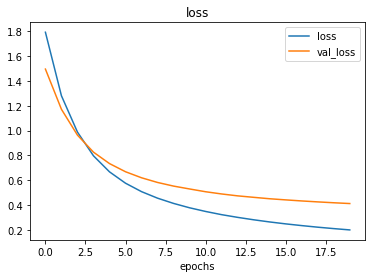

In [ ]:
# 損失の可視化
results[['loss', 'val_loss']].plot(title='loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

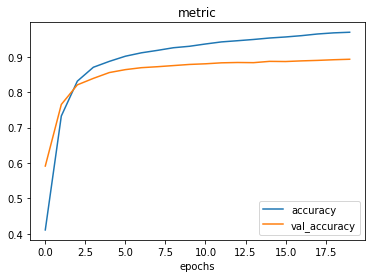

In [ ]:
# 正解率の可視化
results[['accuracy', 'val_accuracy']].plot(title='metric')
plt.xlabel('epochs')